<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/dog_cat_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs and Cats Classification Convnets

##Import

In [ ]:
from sys import path
import matplotlib.pyplot as plt
from keras import layers, models, optimizers, preprocessing

##Dataset

In [ ]:
# DATASET & PREPROCESSING - Cats and Dogs pictures

# provide a dataset filepath with 3 subfolders :
# dataset/
#   train/
#     cats/
#     dogs/
#   validation/
#     cats/
#     dogs/
#   test/
#     cats/
#     dogs/

# Change the dataset filepath
base_dir = path[0] + "/drive/MyDrive/dog-cat-dataset/"
train_dir = base_dir + "/train/"
validation_dir = base_dir + "/validation/"
test_dir = base_dir + "/test/"

# We use data augmentation on train set to prevent overfitting
train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
validation_datagen = preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

# Final train, validation and test data generators
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Model

In [ ]:
# MODEL DEFINITION - the model need to predict if an image shows a dog or a cat

# Convnets & Max Pooling
# We start with an img of 150x150 to finish with an img of 7x7

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# Add dropout to prevent overfitting
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=["acc"],
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

##Training

In [ ]:
# TRAINING

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
)

model.save("cats_and_dogs_small_1.h5")

Epoch 1/30
 63/100 [=================>............] - ETA: 4:27 - loss: 0.6955 - acc: 0.5105

100/100 [==============================] - 916s 9s/step - loss: 0.6955 - acc: 0.5105 - val_loss: 0.6896 - val_acc: 0.5160


##Results

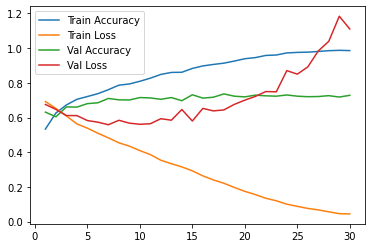

In [ ]:
# LOG TRAINING RESULTS

history_dict = history.history
loss = history_dict['loss']
acc = history_dict['acc']
val_loss = history_dict["val_loss"]
val_acc = history_dict["val_acc"]
epochs = range(1, 31)

plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_acc, label="Val Accuracy")
plt.plot(epochs, val_loss, label="Val Loss")
plt.legend()
plt.show()

In [ ]:
# EVALUATION

score = model.evaluate(test_generator)
print(model.metrics_names)
print(score)

50/50 [==============================] - 300s 6s/step - loss: 1.0392 - acc: 0.7330
['loss', 'acc']
[1.0392199754714966, 0.7329999804496765]
